In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import cv2

In [2]:
train_dir=['../dataset/detection_2/train']
valid_dir=['../dataset/detection_2/valid']
test_dir=['../dataset/detection_2/test']

In [3]:
def read_image(image_folders):
    # Tạo một danh sách để lưu thông tin về hình ảnh
    image_data = []
    # Lặp qua các thư mục và đọc hình ảnh
    for folder in image_folders:
        if not os.path.exists(folder):
            print(f"Đường dẫn không tồn tại: {folder}")
        else:
            print(f"Đọc hình ảnh từ: {folder}")
        image_folder = f'{folder}/images'
        for filename in os.listdir(image_folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Chỉ đọc file ảnh
                img_path = os.path.join(image_folder, filename)
                img = Image.open(img_path)
                #check size of image
                width, height = img.size
                label_path = f'{folder}/labels/{filename[:-4]}.txt'
                # Kiểm tra xem file nhãn có tồn tại không
                if not os.path.exists(label_path):
                    print(f"File nhãn không tồn tại: {label_path}. Bỏ qua.")
                    continue
                image_data.append(
                    {'filename': filename,
                     'image_path': f'{image_folder}/{filename}',
                     'label_path': label_path,
                     'width': width,
                     'height': height}
                )

    # Chuyển danh sách thành DataFrame
    df = pd.DataFrame(image_data)
    return df

In [4]:
train_df = read_image(train_dir)
valid_df = read_image(valid_dir)
test_df = read_image(test_dir)
train_df.shape, valid_df.shape, test_df.shape

Đọc hình ảnh từ: ../dataset/detection_2/train
Đọc hình ảnh từ: ../dataset/detection_2/valid
Đọc hình ảnh từ: ../dataset/detection_2/test


((12172, 5), (1613, 5), (1609, 5))

In [5]:
train_df.head(5)

,filename,image_path,label_path,width,height
0,000000_jpg.rf.9c2d93c681b7d38d50bf4f096a6baf03...,../dataset/detection/train/images/000000_jpg.r...,../dataset/detection/train/labels/000000_jpg.r...,416,416
1,000000_jpg.rf.b11f308f16626f9f795a148029c46d10...,../dataset/detection/train/images/000000_jpg.r...,../dataset/detection/train/labels/000000_jpg.r...,416,416
2,000001_jpg.rf.4f8eac6747a989e40bff9c86bc5d97be...,../dataset/detection/train/images/000001_jpg.r...,../dataset/detection/train/labels/000001_jpg.r...,416,416
3,000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50...,../dataset/detection/train/images/000001_jpg.r...,../dataset/detection/train/labels/000001_jpg.r...,416,416
4,000002_jpg.rf.0fbb15854c0866ff8449b3f32f9dd0e5...,../dataset/detection/train/images/000002_jpg.r...,../dataset/detection/train/labels/000002_jpg.r...,416,416


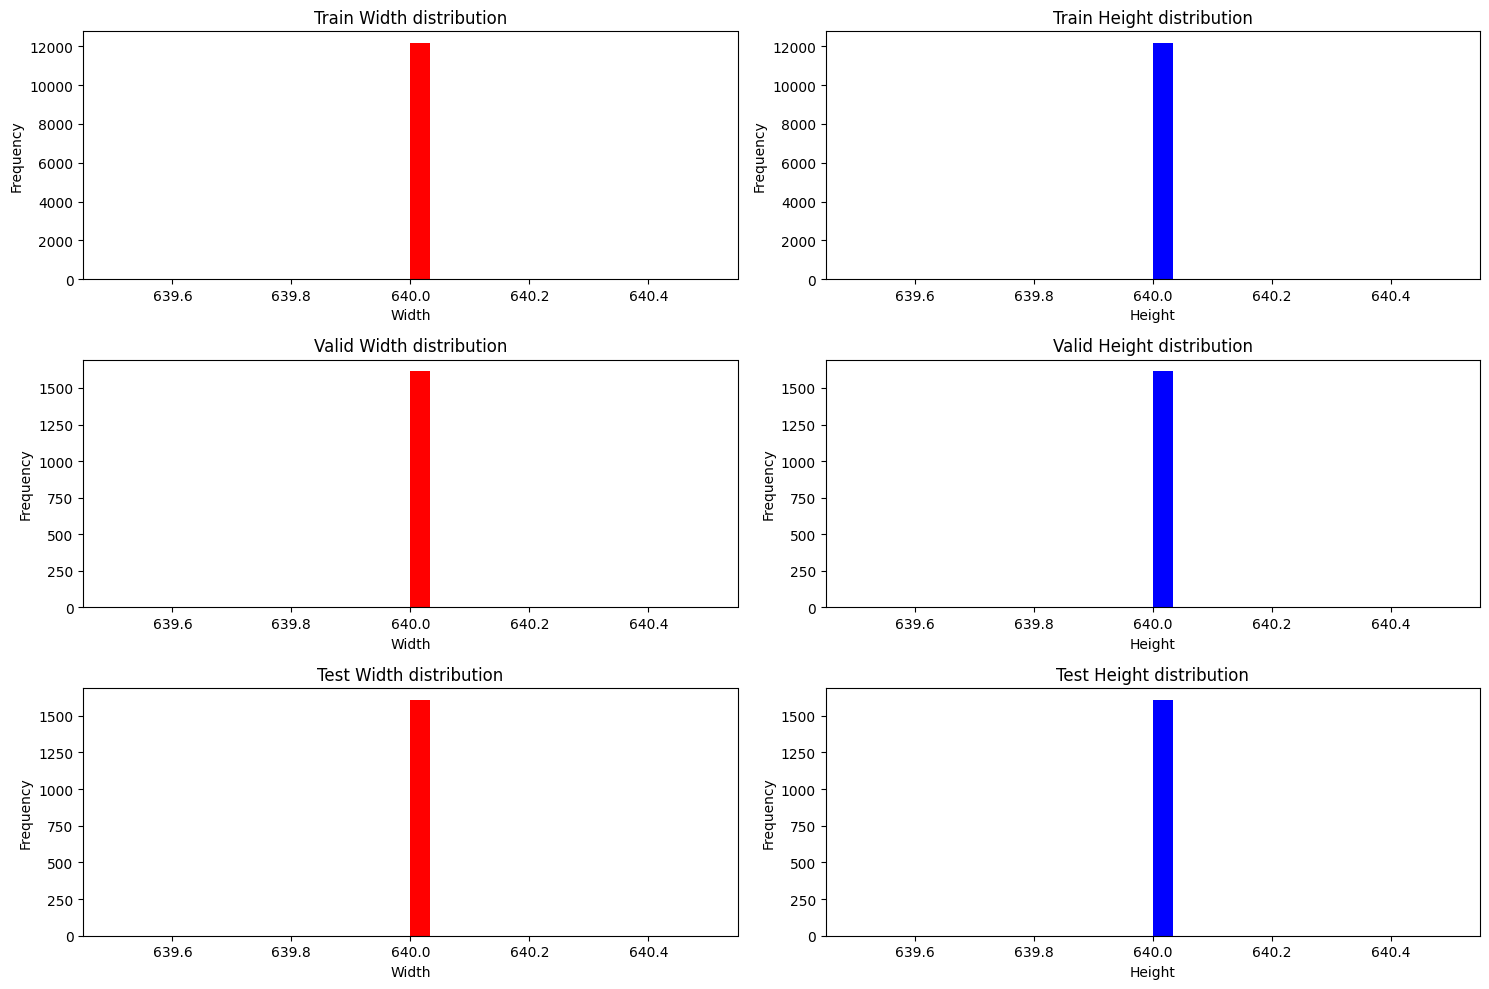

In [5]:
import matplotlib.pyplot as plt

# Giả sử train_df, valid_df và test_df đã được định nghĩa
# Vẽ biểu đồ phân phối chiều rộng và chiều cao của ảnh trong train, valid và test

plt.figure(figsize=(15, 10))

# Train width and height distribution
plt.subplot(3, 2, 1)
plt.hist(train_df['width'], bins=30, color='r')
plt.title('Train Width distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
plt.hist(train_df['height'], bins=30, color='b')
plt.title('Train Height distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Valid width and height distribution
plt.subplot(3, 2, 3)
plt.hist(valid_df['width'], bins=30, color='r')
plt.title('Valid Width distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.hist(valid_df['height'], bins=30, color='b')
plt.title('Valid Height distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Test width and height distribution
plt.subplot(3, 2, 5)
plt.hist(test_df['width'], bins=30, color='r')
plt.title('Test Width distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
plt.hist(test_df['height'], bins=30, color='b')
plt.title('Test Height distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [114]:
def remove_trailing_empty_lines(file_path):
    # Read
    with open(file_path, 'r') as file:
        lines = file.readlines()
    cleaned_lines = [line.rstrip('\n') for line in lines]

    # Write the cleaned lines back to the file
    with open(file_path, 'w') as file:
        for line in cleaned_lines[:len(cleaned_lines) - 1]:
            file.write(line + '\n')    
        try:
            file.write(cleaned_lines[-1])
        except IndexError:
            print(file_path)
# Ví dụ sử dụng hàm

In [115]:
for row in test_df.iterrows():
    _, data = row
    remove_trailing_empty_lines(data['label_path'])
    
for row in valid_df.iterrows():
    _, data = row
    remove_trailing_empty_lines(data['label_path'])
    
for row in train_df.iterrows():
    _, data = row
    remove_trailing_empty_lines(data['label_path'])
    

In [116]:
#remove image with no bounding box in label
def remove_image_with_no_bbox(image_path, label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    if len(lines) == 0:
        os.remove(image_path)
        os.remove(label_path)

In [117]:
for row in test_df.iterrows():
    _, data = row
    remove_image_with_no_bbox(data['image_path'], data['label_path'])
for row in valid_df.iterrows():
    _, data = row
    remove_image_with_no_bbox(data['image_path'], data['label_path'])
    
for row in train_df.iterrows():
    _, data = row
    remove_image_with_no_bbox(data['image_path'], data['label_path'])
    

In [12]:
def convert_bounding_box_xyxy_to_xywh(label_file):
    with open(label_file, 'r') as file:
        lines = file.readlines()
    new_lines = []
    for line in lines:
        line = line.strip().split()
        if len(line) == 0:
            continue
        # Convert to xywh
        x_center = float(line[1])
        y_center = float(line[2])
        width = float(line[3])
        height = float(line[4])
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        new_line = f"{line[0]} {x_min} {y_min} {width} {height}\n"
        new_lines.append(new_line)
    with open(label_file, 'w') as file:
        for line in new_lines:
            file.write(line)

In [13]:
for row in test_df.iterrows():
    _, data = row
    convert_bounding_box_xyxy_to_xywh(data['label_path'])
for row in valid_df.iterrows():
    _, data = row
    convert_bounding_box_xyxy_to_xywh(data['label_path'])
for row in train_df.iterrows():
    _, data = row
    convert_bounding_box_xyxy_to_xywh(data['label_path'])